Emanuel Victor da Silva Favorato - 12558151

In [ ]:
from sklearn import tree
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from datetime import datetime

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf

sns.set(style='whitegrid')

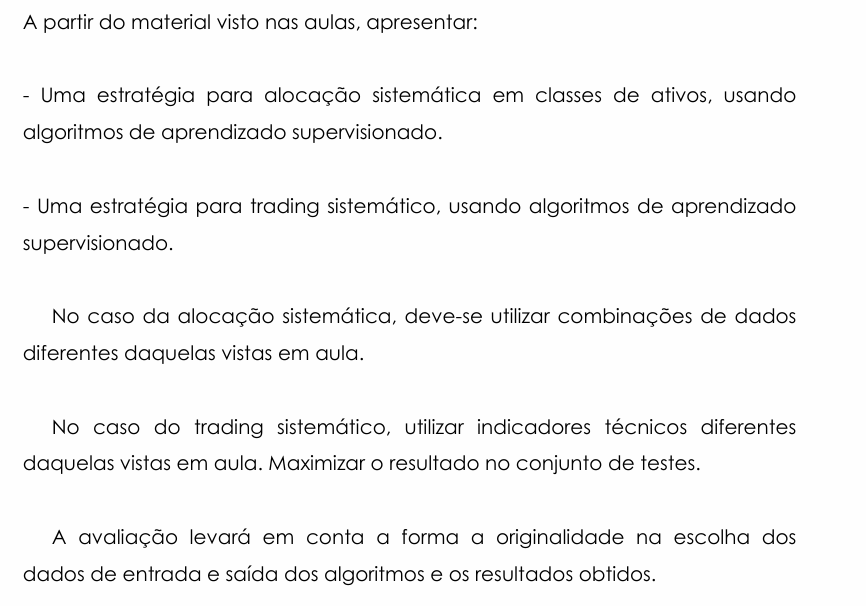

In [ ]:
dados=pd.read_excel('Dados_Classes_Indices.xlsx', engine='openpyxl')
dados.set_index(keys = 'Data', inplace = True)
dados

,USD,IBOV,IMAB,IPCA,SELIC-ACC,SELIC-META,SP500BR
Data,,,,,,,
Set-2003,2.9234,16010.00,732.134779,10.520830,987.926836,19.84,2911.618698
Out-2003,2.8562,17982.00,749.921194,10.551340,1004.149186,18.85,3001.037902
Nov-2003,2.9494,20183.00,780.713506,10.587210,1017.640246,17.32,3121.055080
Dez-2003,2.8892,22236.00,811.970067,10.642263,1031.614995,16.33,3212.559264
Jan-2004,2.9409,21851.00,859.640824,10.723145,1044.691245,16.29,3326.481399
...,...,...,...,...,...,...,...
Dez-2023,4.8413,134185.24,9907.091003,32.333332,7915.548970,11.65,23092.177979
Jan-2024,4.9535,127752.28,9862.560678,32.469132,7992.068230,11.65,24002.927275
Fev-2024,4.9833,129020.02,9916.762551,32.738626,8056.021400,11.15,25396.242291


In [ ]:
dados_chg = dados.pct_change()
dados_chg.fillna(0, inplace=True)
dados_chg

,USD,IBOV,IMAB,IPCA,SELIC-ACC,SELIC-META,SP500BR
Data,,,,,,,
Set-2003,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000
Out-2003,-0.022987,0.123173,0.024294,0.0029,0.016421,-0.049899,0.030711
Nov-2003,0.032631,0.122400,0.041061,0.0034,0.013435,-0.081167,0.039992
Dez-2003,-0.020411,0.101719,0.040036,0.0052,0.013733,-0.057159,0.029318
Jan-2004,0.017894,-0.017314,0.058710,0.0076,0.012676,-0.002449,0.035461
...,...,...,...,...,...,...,...
Dez-2023,-0.019086,0.053829,0.027507,0.0056,0.008945,-0.041152,0.024299
Jan-2024,0.023176,-0.047941,-0.004495,0.0042,0.009667,0.000000,0.039440
Fev-2024,0.006016,0.009923,0.005496,0.0083,0.008002,-0.042918,0.058048


# **Alocação sistemática**

**Alocação em Classes**

In [ ]:
#Calculo dos índices acumulados em 12 meses (base 100)
dados_acc12 = (dados/dados.shift(12)-1)

In [ ]:
#Criação do dataframe de alocação em classes (SP500BR e IMAB), de acordo com o momentum de 12 meses
dados_aloc2 = dados[['SP500BR', 'IMAB']].pct_change()
dados_aloc2['IMAB-ACC12'] = dados_acc12['IMAB']
dados_aloc2['SP500BR-ACC12'] = dados_acc12['SP500BR']
dados_aloc2.fillna(0, inplace=True)
dados_aloc2['OPT-IMAB'] = 0

dados_aloc2['OPT-IMAB'] = np.argmin(dados_aloc2[['IMAB-ACC12', 'SP500BR-ACC12']].reset_index().drop(['Data'], axis=1).to_numpy(), axis=1)
dados_aloc2['OPT-SP500BR'] = 1-dados_aloc2['OPT-IMAB']

dados_aloc2[['OPT-IMAB', 'OPT-SP500BR']] = dados_aloc2[['OPT-IMAB', 'OPT-SP500BR']].shift(1)

#Cálculo das variações da alocação
dados_aloc2 = dados_aloc2.iloc[13:]
dados_aloc2['BEST-ALOC'] = dados_aloc2['IMAB']*dados_aloc2['OPT-IMAB']+dados_aloc2['SP500BR']*dados_aloc2['OPT-SP500BR']

#Cálculo do resultado acumulado da alocação
n_train = 124
data = dados
data['BEST-ALOC-ACC']=(1 + dados_aloc2['BEST-ALOC']).cumprod()
data = (data/data.iloc[n_train]).iloc[n_train:]

dados_aloc2

,SP500BR,IMAB,IMAB-ACC12,SP500BR-ACC12,OPT-IMAB,OPT-SP500BR,BEST-ALOC
Data,,,,,,,
Out-2004,0.013269,0.009512,0.263393,0.075767,1.0,0.0,0.009512
Nov-2004,-0.007145,0.011878,0.227978,0.027009,1.0,0.0,0.011878
Dez-2004,0.003610,0.015071,0.198501,0.001358,1.0,0.0,0.015071
Jan-2005,-0.036160,0.012081,0.145716,-0.067905,1.0,0.0,0.012081
Fev-2005,0.007327,0.005474,0.135498,-0.063790,1.0,0.0,0.005474
...,...,...,...,...,...,...,...
Dez-2023,0.024299,0.027507,0.160543,0.152686,1.0,0.0,0.027507
Jan-2024,0.039440,-0.004495,0.155336,0.154664,1.0,0.0,-0.004495
Fev-2024,0.058048,0.005496,0.146985,0.228311,1.0,0.0,0.005496


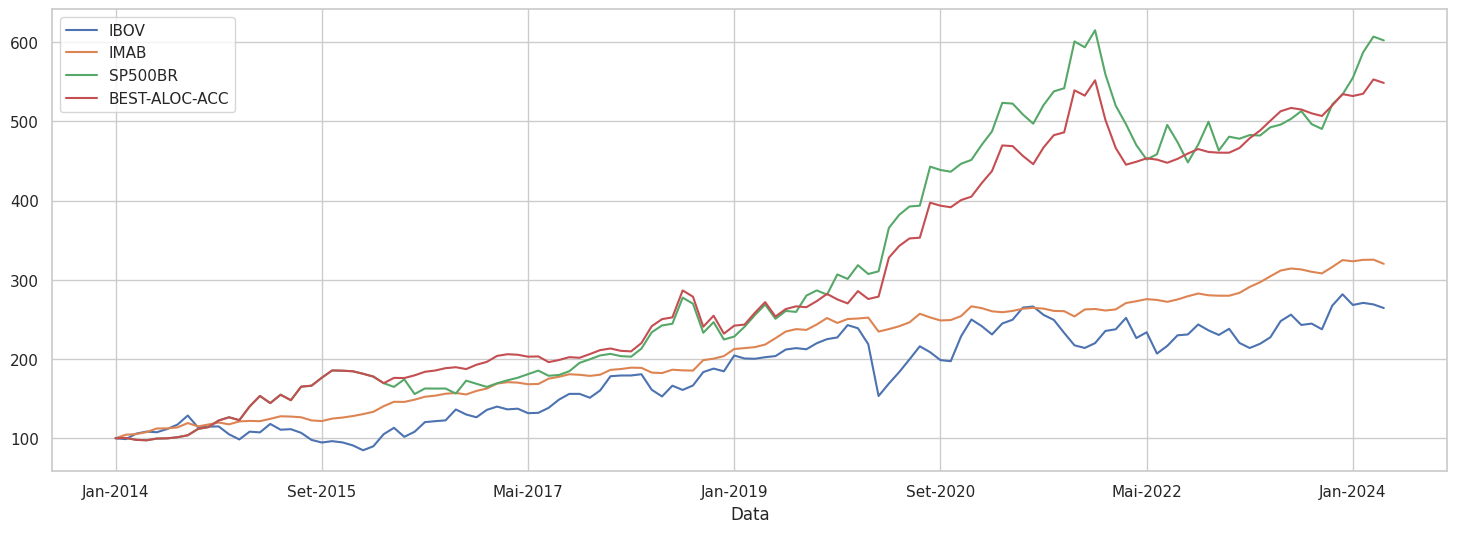

In [ ]:
data = 100*data
data[['IBOV', 'IMAB', 'SP500BR', 'BEST-ALOC-ACC']].plot(figsize=(18,6), grid=True);

Preparando os dados para aprendizado de máquina

In [ ]:
#Cálculo do Momentum de 1, 4 e 12 meses para todos os índices
dados_mom1 = dados.copy()
dados_mom1.iloc[0:4] = 0
mom_period = 1

for ind in range(mom_period, len(dados.index)):
  dados_mom1.iloc[ind] = dados.iloc[ind]/dados.iloc[ind-mom_period]

dados_mom4 = dados.copy()
dados_mom4.iloc[0:4] = 0
mom_period = 4

for ind in range(mom_period, len(dados.index)):
  dados_mom4.iloc[ind] = dados.iloc[ind]/dados.iloc[ind-mom_period]

dados_mom12 = dados.copy()
dados_mom12.iloc[0:12] = 0
mom_period = 12

for ind in range(mom_period, len(dados.index)):
  dados_mom12.iloc[ind] = dados.iloc[ind]/dados.iloc[ind-mom_period]

In [ ]:
#Criando o data frame com informações para o algoritmo de aprendizado
dados_apr = dados_chg[['SP500BR', 'IMAB']].copy()

#Selecionando o Momentum do SP500BR para entrada do algoritmo
dados_apr['MOM1'] = dados_mom1['SP500BR']
dados_apr['MOM4'] = dados_mom4['SP500BR']
dados_apr['MOM12'] = dados_mom12['SP500BR']

#Criando as colunas com os resultados de alocação ideais (saída do algoritmo)
dados_apr['SP500BR-BUY'] = np.argmin(dados_apr[['SP500BR', 'IMAB']].reset_index().drop(['Data'], axis=1).to_numpy(), axis=1)
dados_apr['IMAB-BUY'] = np.argmax(dados_apr[['SP500BR', 'IMAB']].reset_index().drop(['Data'], axis=1).to_numpy(), axis=1)

In [ ]:
dados_apr

,SP500BR,IMAB,MOM1,MOM4,MOM12,SP500BR-BUY,IMAB-BUY
Data,,,,,,,
Set-2003,0.000000,0.000000,0.000000,0.000000,0.000000,0,0
Out-2003,0.030711,0.024294,1.030711,0.000000,0.000000,1,0
Nov-2003,0.039992,0.041061,1.039992,0.000000,0.000000,0,1
Dez-2003,0.029318,0.040036,1.029318,0.000000,0.000000,0,1
Jan-2004,0.035461,0.058710,1.035461,1.142485,0.000000,0,1
...,...,...,...,...,...,...,...
Dez-2023,0.024299,0.027507,1.024299,1.040833,1.152686,0,1
Jan-2024,0.039440,-0.004495,1.039440,1.117827,1.154664,1,0
Fev-2024,0.058048,0.005496,1.058048,1.197363,1.228311,1,0


In [ ]:
#Criando os vetores Numpy com as entradas (din) e saídas desejadas (dout)
#din = dados_apr[['MOM4', 'MOM12']].reset_index().drop(['Data'], axis=1).to_numpy()
din = dados_apr[['MOM1', 'MOM4', 'MOM12']].reset_index().drop(['Data'], axis=1).to_numpy()
dout = dados_apr[['SP500BR-BUY', 'IMAB-BUY']].reset_index().drop(['Data'], axis=1).to_numpy()

print("Data samples:", dout.shape[0])

Data samples: 248


**Utilizando Random Forest**

In [ ]:
#Número de samples para treinamento
n_train = 124

#Separando os dados em conjunto de treinamento e validação
train_in =   din[12:12+n_train]
train_out = dout[13:13+n_train]

val_in =   din[12+n_train:dout.shape[0]-1]
val_out = dout[13+n_train:dout.shape[0]]

In [ ]:
# Treinamento com Árvores de decisão ou Random Forests

clf = RandomForestClassifier(random_state=1, max_depth=15)

clf.fit(train_in, train_out)

RandomForestClassifier(max_depth=15, random_state=1)

In [ ]:
#Avaliando os resultados
y_pred = clf.predict(train_in)
print("Accuracy train:",metrics.accuracy_score(train_out, y_pred))

y_pred = clf.predict(val_in)
print("Accuracy validation:",metrics.accuracy_score(val_out, y_pred))

y_pred = clf.predict(din)

Accuracy train: 1.0
Accuracy validation: 0.5585585585585585


In [ ]:
#Copiando as saídas do algoritmo de aprendizado para o Data frame
dados_apr['SP500BR-BUY-APR'] = np.argmin(y_pred, axis=1)
dados_apr['IMAB-BUY-APR'] = np.argmax(y_pred, axis=1)

dados_apr['SP500BR-BUY-APR'] = dados_apr['SP500BR-BUY-APR'].shift(1)
dados_apr['IMAB-BUY-APR'] = dados_apr['IMAB-BUY-APR'].shift(1)

#Calculando o resultado acumulado do investimento utilizando aprendizado
dados_apr['APR-CHG'] = dados_apr['SP500BR'] * dados_apr['SP500BR-BUY-APR'] + dados_apr['IMAB'] * dados_apr['IMAB-BUY-APR']
dados['APR-ACC'] = (1 + dados_apr['APR-CHG']).cumprod()

<Axes: xlabel='Data'>

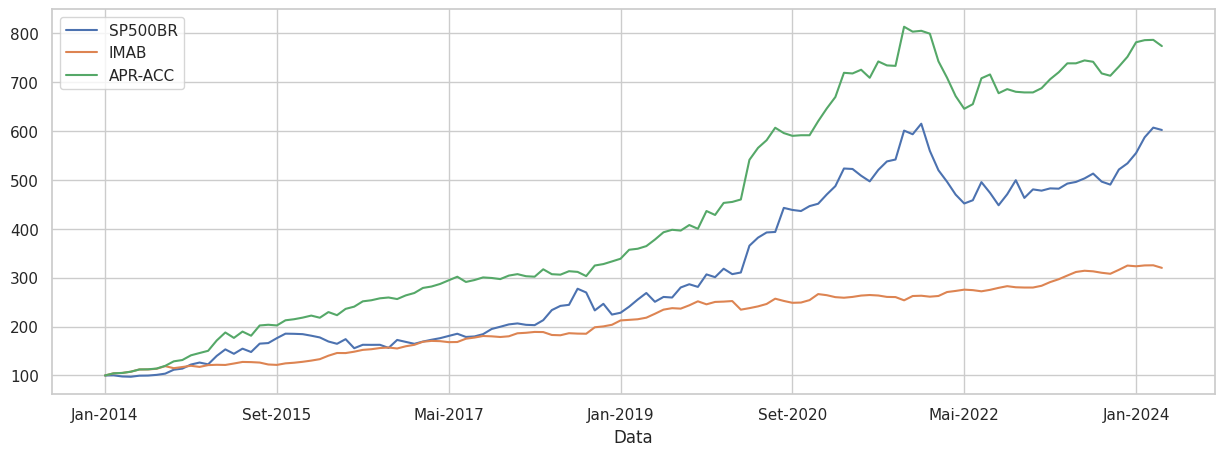

In [ ]:
# Gráfico de comparação SP500BR x IMAB x Aprendizado
dados = dados*100 / dados.iloc[n_train]
dados[['SP500BR', 'IMAB', 'APR-ACC']].iloc[n_train:].plot(figsize = (15,5))

In [ ]:
# Retorno e volatilidade SP500BR x IMAB x Aprendizado
ref_data = n_train
periodo = int(len(dados.index[ref_data+1:])/12)
print("Periodo:", dados.index[ref_data+1], "-", dados.index[-1], '(', periodo,')')

ret_acc = (dados[['SP500BR', 'IMAB', 'APR-ACC']].iloc[-1]/dados[['SP500BR', 'IMAB', 'APR-ACC']].iloc[ref_data])
print("Retorno acumulado:\n", ret_acc)
ret_aa = ((dados[['SP500BR', 'IMAB', 'APR-ACC']].iloc[-1]/dados[['SP500BR', 'IMAB', 'APR-ACC']].iloc[ref_data])**(1/periodo))-1
print("Retorno anualizado:\n", ret_aa)
vol_aa = dados_apr[['SP500BR', 'IMAB', 'APR-CHG']].iloc[ref_data+1:].std()*np.sqrt(12)
print("Vol anualizada:\n", vol_aa)

Periodo: Fev-2014 - Abr-2024 ( 10 )
Retorno acumulado:
 SP500BR    6.021501
IMAB       3.201308
APR-ACC    7.737896
dtype: float64
Retorno anualizado:
 SP500BR    0.196659
IMAB       0.123396
APR-ACC    0.227050
dtype: float64
Vol anualizada:
 SP500BR    0.177137
IMAB       0.070247
APR-CHG    0.131956
dtype: float64


**Utilizando Redes Neurais MLP**

In [ ]:
# Treinamento com Redes Neurais MLP

#clf = MLPClassifier(random_state=1, hidden_layer_sizes=(20, ), max_iter=1000, solver='adam', activation='relu')
clf = MLPClassifier(random_state=1, hidden_layer_sizes=(20, 5), max_iter=1000000, solver='lbfgs', activation='tanh')
clf.fit(train_in, train_out)

MLPClassifier(activation='tanh', hidden_layer_sizes=(20, 5), max_iter=1000000,
              random_state=1, solver='lbfgs')

In [ ]:
#Avaliando os resultados
y_pred = clf.predict(train_in)
print("Accuracy train:",metrics.accuracy_score(train_out, y_pred))

y_pred = clf.predict(val_in)
print("Accuracy validation:",metrics.accuracy_score(val_out, y_pred))

y_pred = clf.predict(din)

Accuracy train: 0.7983870967741935
Accuracy validation: 0.5765765765765766


In [ ]:
#Copiando as saídas do algoritmo de aprendizado para o Data frame
dados_apr['SP500BR-BUY-APR'] = np.argmin(y_pred, axis=1)
dados_apr['IMAB-BUY-APR'] = np.argmax(y_pred, axis=1)

dados_apr['SP500BR-BUY-APR'] = dados_apr['SP500BR-BUY-APR'].shift(1)
dados_apr['IMAB-BUY-APR'] = dados_apr['IMAB-BUY-APR'].shift(1)

#Calculando o resultado acumulado do investimento utilizando aprendizado
dados_apr['APR-CHG'] = dados_apr['SP500BR'] * dados_apr['SP500BR-BUY-APR'] + dados_apr['IMAB'] * dados_apr['IMAB-BUY-APR']
dados['APR-ACC'] = (1 + dados_apr['APR-CHG']).cumprod()

<Axes: xlabel='Data'>

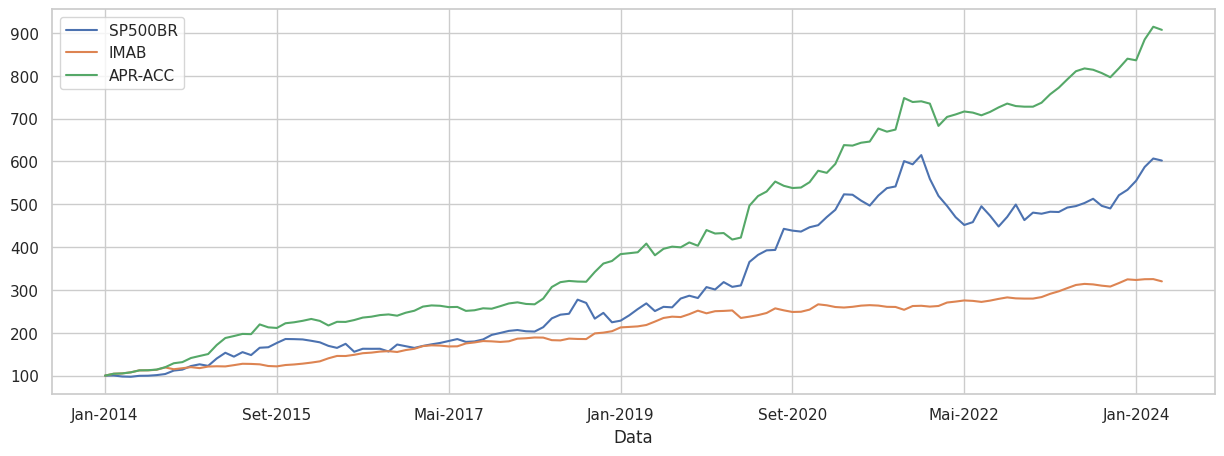

In [ ]:
# Gráfico de comparação SP500BR x IMAB x Aprendizado
dados = dados*100 / dados.iloc[n_train]
dados[['SP500BR', 'IMAB', 'APR-ACC']].iloc[n_train:].plot(figsize = (15,5))

In [ ]:
# Retorno e volatilidade SP500BR x IMAB x Aprendizado
ref_data = n_train
periodo = int(len(dados.index[ref_data+1:])/12)
print("Periodo:", dados.index[ref_data+1], "-", dados.index[-1], '(', periodo,')')

ret_acc = (dados[['SP500BR', 'IMAB', 'APR-ACC']].iloc[-1]/dados[['SP500BR', 'IMAB', 'APR-ACC']].iloc[ref_data])
print("Retorno acumulado:\n", ret_acc)
ret_aa = ((dados[['SP500BR', 'IMAB', 'APR-ACC']].iloc[-1]/dados[['SP500BR', 'IMAB', 'APR-ACC']].iloc[ref_data])**(1/periodo))-1
print("Retorno anualizado:\n", ret_aa)
vol_aa = dados_apr[['SP500BR', 'IMAB', 'APR-CHG']].iloc[ref_data+1:].std()*np.sqrt(12)
print("Vol anualizada:\n", vol_aa)

Periodo: Fev-2014 - Abr-2024 ( 10 )
Retorno acumulado:
 SP500BR    6.021501
IMAB       3.201308
APR-ACC    9.073810
dtype: float64
Retorno anualizado:
 SP500BR    0.196659
IMAB       0.123396
APR-ACC    0.246749
dtype: float64
Vol anualizada:
 SP500BR    0.177137
IMAB       0.070247
APR-CHG    0.124325
dtype: float64


# **Trading sistemático**

In [ ]:
!pip install ta
!pip install yfinance --upgrade --no-cache-dir

from ta.trend import MACD
from ta.momentum import RSIIndicator
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')

In [ ]:
start_date = '2014-01-01'
end_date   = '2024-04-30'

dados = yf.download('PETR4.SA', start=start_date, end=end_date, interval='1d')[['Open', 'High', 'Low', 'Close', 'Volume']]
dados = dados.dropna()

/tmp/ipython-input-29-1867127844.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  dados = yf.download('PETR4.SA', start=start_date, end=end_date, interval='1d')[['Open', 'High', 'Low', 'Close', 'Volume']]
[*********************100%***********************]  1 of 1 completed


**Considerando Moving Average Convergence Divergence (MACD) e Relative Strenght Index (RSI)**

Mais informações em: https://ftmo.com/pt/os-11-principais-indicadores-tecnicos-que-podem-mudar-seu-trading-para-sempre/

In [ ]:
# Corrigir MultiIndex nas colunas
dados.columns = dados.columns.droplevel(0)  # Remove 'Price'
dados.columns.name = None  # Remove o nome da coluna

dados.columns = ['Open', 'High', 'Low', 'Close', 'Volume']
dados

,Open,High,Low,Close,Volume
Date,,,,,
2014-01-02,4.939661,4.954062,4.795647,4.824450,17284800
2014-01-03,4.821569,4.833091,4.726520,4.752443,17837600
2014-01-06,4.738041,4.792766,4.654513,4.787006,20526500
2014-01-07,4.795647,4.847492,4.642994,4.654514,19052500
2014-01-08,4.686197,4.720760,4.648753,4.663155,15874600
...,...,...,...,...,...
2024-04-23,32.796323,32.978525,32.447761,32.812164,35456900
2024-04-24,32.915146,33.263708,32.645804,32.661648,45388300
2024-04-25,32.796319,33.651873,32.542821,33.445908,66372400


In [ ]:
# MACD
macd_indicator = MACD(close=dados['Close'], window_slow=28, window_fast=14, window_sign=9)
dados['macd'] = macd_indicator.macd()
dados['macd_signal'] = macd_indicator.macd_signal()

# RSI
rsi_indicator = RSIIndicator(close=dados['Close'], window=14)
dados['rsi'] = rsi_indicator.rsi()

In [ ]:
# Estratégia com MACD: compra quando MACD cruza acima da linha de sinal, vende quando cruza abaixo
dados['Saldo Trade'] = 100
comprado = 0
saldo = 100

for i in range(1, len(dados)):
    if dados['macd'].iloc[i-1] < dados['macd_signal'].iloc[i-1] and dados['macd'].iloc[i] > dados['macd_signal'].iloc[i] and comprado == 0:
        comprado = 1
        val_compra = dados['Close'].iloc[i]
    elif dados['macd'].iloc[i-1] > dados['macd_signal'].iloc[i-1] and dados['macd'].iloc[i] < dados['macd_signal'].iloc[i] and comprado == 1:
        comprado = 0
        saldo = saldo * (dados['Close'].iloc[i] / val_compra)

    dados['Saldo Trade'].iloc[i] = saldo

Retorno acumulado com MACD:
Close           7.114893
Saldo Trade    10.870685
Name: 2024-04-29 00:00:00, dtype: float64


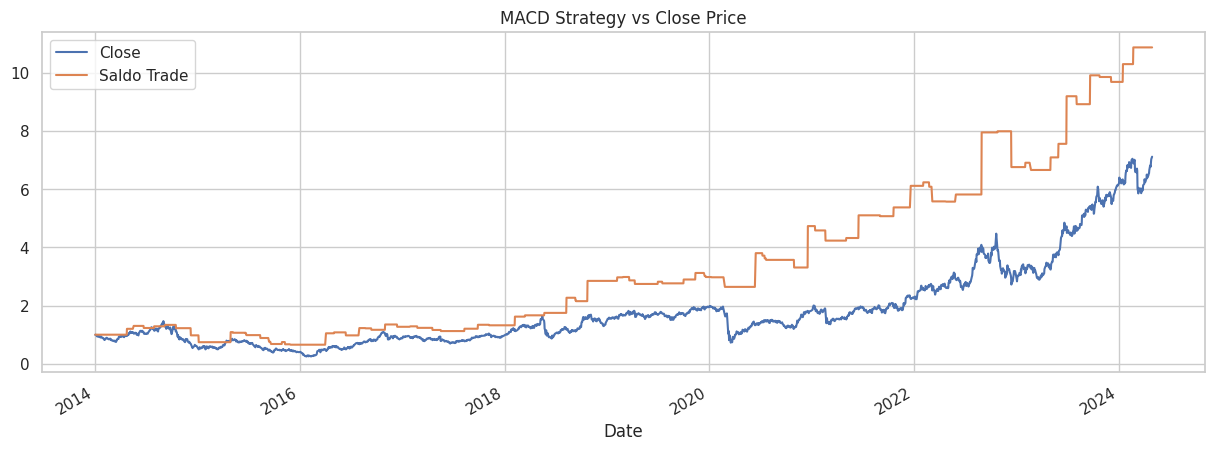

In [ ]:
dados_plot = dados[['Close', 'Saldo Trade']] / dados[['Close', 'Saldo Trade']].iloc[0]
dados_plot.plot(figsize=(15,5), title="MACD Strategy vs Close Price");
print('Retorno acumulado com MACD:')
print(dados_plot.iloc[-1])

In [ ]:
# Estratégia com RSI: compra se RSI < 30 e vende se RSI > 70
dados['Saldo Trade'] = 100
comprado = 0
saldo = 100

for i in range(1, len(dados)):
    if dados['rsi'].iloc[i] < 30 and comprado == 0:
        comprado = 1
        val_compra = dados['Close'].iloc[i]
    elif dados['rsi'].iloc[i] > 70 and comprado == 1:
        comprado = 0
        saldo = saldo * (dados['Close'].iloc[i] / val_compra)

    dados['Saldo Trade'].iloc[i] = saldo

Retorno acumulado com RSI:
Close          7.114893
Saldo Trade    1.780573
Name: 2024-04-29 00:00:00, dtype: float64


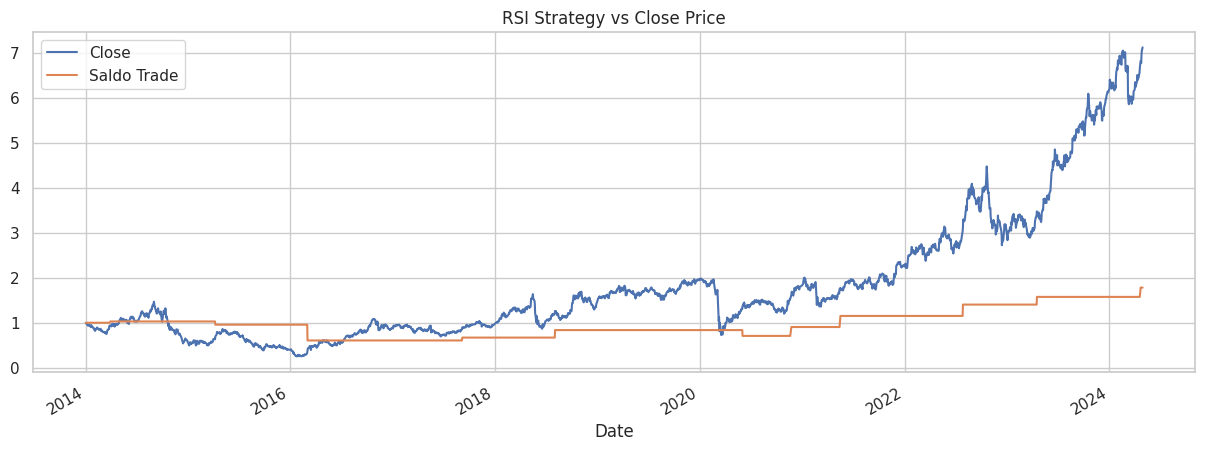

In [ ]:
dados_plot = dados[['Close', 'Saldo Trade']] / dados[['Close', 'Saldo Trade']].iloc[0]
dados_plot.plot(figsize=(15,5), title="RSI Strategy vs Close Price");
print('Retorno acumulado com RSI:')
print(dados_plot.iloc[-1])

**Considerando Aprendizado de Máquina MLP e Random Forest com MACD e RSI**

In [ ]:
# Initialize Action column
dados['Action'] = -1000

# Window-based buy/sell signal assignment (periodo_tam = 11 days)
periodo_inicio = 0
periodo_tam = 14
periodo_fim = periodo_inicio + periodo_tam
total_dados = dados.shape[0]
cont = 0

while cont < total_dados:
    # Prevent index overflow
    if periodo_fim > total_dados - 2:
        periodo_fim = total_dados - 2

    window_close = dados['Close'].iloc[periodo_inicio:periodo_fim]
    min_close = window_close.min()
    max_close = window_close.max()

    for i in range(periodo_inicio, periodo_fim):
        if dados['Close'].iloc[i] == min_close:
            dados.loc[dados.index[i], 'Action'] = 0  # Hold on min day
            dados.loc[dados.index[i + 1], 'Action'] = 1  # Buy next day
        elif dados['Close'].iloc[i] == max_close:
            dados.loc[dados.index[i], 'Action'] = 0  # Hold on max day
            dados.loc[dados.index[i + 1], 'Action'] = -1  # Sell next day
        elif dados['Action'].iloc[i] == -1000:
            dados.loc[dados.index[i], 'Action'] = 0  # Hold if no signal

    periodo_inicio = periodo_fim + 1
    periodo_fim = periodo_inicio + periodo_tam
    cont = periodo_fim

# Calculate MACD and RSI indicators
macd_indicator = MACD(close=dados['Close'], window_slow=26, window_fast=12, window_sign=9)
dados['macd'] = macd_indicator.macd()
dados['macd_signal'] = macd_indicator.macd_signal()

rsi_indicator = RSIIndicator(close=dados['Close'], window=14)
dados['RSI'] = rsi_indicator.rsi() / 100.0  # normalize RSI

# Drop rows with NaNs generated by indicators
dados = dados.dropna().reset_index(drop=True)

# Features and target for ML
features = dados[['macd', 'macd_signal', 'RSI']].to_numpy()
target = dados['Action'].to_numpy()

print(f"Features shape: {features.shape}")
print(f"Target shape: {target.shape}")

# Train/test split (shift target by 1 for prediction of next day)
train_n = 1000
total_n = features.shape[0]

train_in = features[0:train_n]
train_out = target[1:train_n + 1]

test_in = features[train_n:total_n - 1]
test_out = target[train_n + 1:total_n]

print(f"Train in shape: {train_in.shape}")
print(f"Train out shape: {train_out.shape}")
print(f"Test in shape: {test_in.shape}")
print(f"Test out shape: {test_out.shape}")

Features shape: (2533, 3)
Target shape: (2533,)
Train in shape: (1000, 3)
Train out shape: (1000,)
Test in shape: (1532, 3)
Test out shape: (1532,)


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF F,G EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/tmp/ipython-input-61-3939971659.py:61: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '121.27934216239453' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  dados.loc[dados.index[i], 'Saldo'] = saldo


Training accuracy: 0.885
Test accuracy: 0.706
Trades total: 25, Trades positivos: 15 (60.00%)
Média trades positivos: 39.65%, Média trades negativos: -10.16%
Rent. buy and hold: 744.61%
Rent. ML trade: 3354.08%


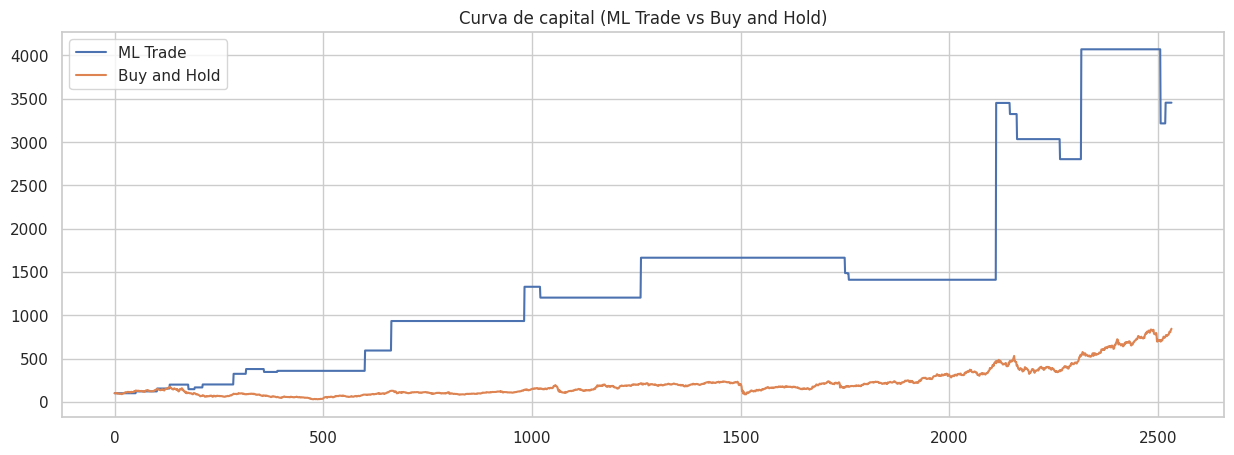

In [ ]:
clf = MLPClassifier(solver='lbfgs', hidden_layer_sizes=(25, 10), random_state=1, max_iter=200000, activation='tanh')

# Train the model
clf.fit(train_in, train_out)

# Evaluate on train
y_pred_train = clf.predict(train_in)
print(f"Training accuracy: {metrics.accuracy_score(train_out, y_pred_train):.3f}")

# Evaluate on test
y_pred_test = clf.predict(test_in)
print(f"Test accuracy: {metrics.accuracy_score(test_out, y_pred_test):.3f}")

# Predict on all available features (aligned with dados)
y_pred_all = clf.predict(features)

# Add ML predictions to DataFrame
dados['ML-Action'] = y_pred_all

# Simulate trading results based on ML predictions
dados['Saldo'] = 0
saldo = 100
comprado = 0
val_neg = 0
trades = 0
trades_pos = 0
media_pos = 0
media_neg = 0

for i in range(len(dados)):
    action = dados['ML-Action'].iloc[i]
    price = dados['Close'].iloc[i]

    if action == 1 and comprado == 0:
        val_neg = price
        comprado = 1
    elif action == 1 and comprado == -1:
        res_trade = val_neg / price - 1
        if res_trade > 0:
            trades_pos += 1
            media_pos += res_trade
        else:
            media_neg += res_trade
        saldo *= (1 + res_trade)
        trades += 1
        comprado = 0
    elif action == -1 and comprado == 0:
        comprado = -1
        val_neg = price
    elif action == -1 and comprado == 1:
        res_trade = price / val_neg - 1
        if res_trade > 0:
            trades_pos += 1
            media_pos += res_trade
        else:
            media_neg += res_trade
        saldo *= (1 + res_trade)
        trades += 1
        comprado = 0

    dados.loc[dados.index[i], 'Saldo'] = saldo

if trades_pos > 0:
    print(f"Trades total: {trades}, Trades positivos: {trades_pos} ({trades_pos/trades*100:.2f}%)")
    print(f"Média trades positivos: {media_pos/trades_pos*100:.2f}%, Média trades negativos: {media_neg/(trades - trades_pos)*100:.2f}%")
    print(f"Rent. buy and hold: {(dados['Close'].iloc[-1] / dados['Close'].iloc[0] - 1) * 100:.2f}%")
    print(f"Rent. ML trade: {(dados['Saldo'].iloc[-1] / dados['Saldo'].iloc[0] - 1) * 100:.2f}%")
else:
    print("Não foram feitos trades no período.")

# Plot equity curve
plt.figure(figsize=(15,5))
plt.title('Curva de capital (ML Trade vs Buy and Hold)')
plt.plot(dados['Saldo'], label='ML Trade')
plt.plot((dados['Close'] / dados['Close'].iloc[0]) * 100, label='Buy and Hold')
plt.legend()
plt.show()

Training accuracy: 0.998
Test accuracy: 0.803
Trades total: 78, Trades positivos: 71 (91.03%)
Média trades positivos: 18.06%, Média trades negativos: -15.48%
Rent. buy and hold: 744.61%
Rent. ML trade: 2258138.74%


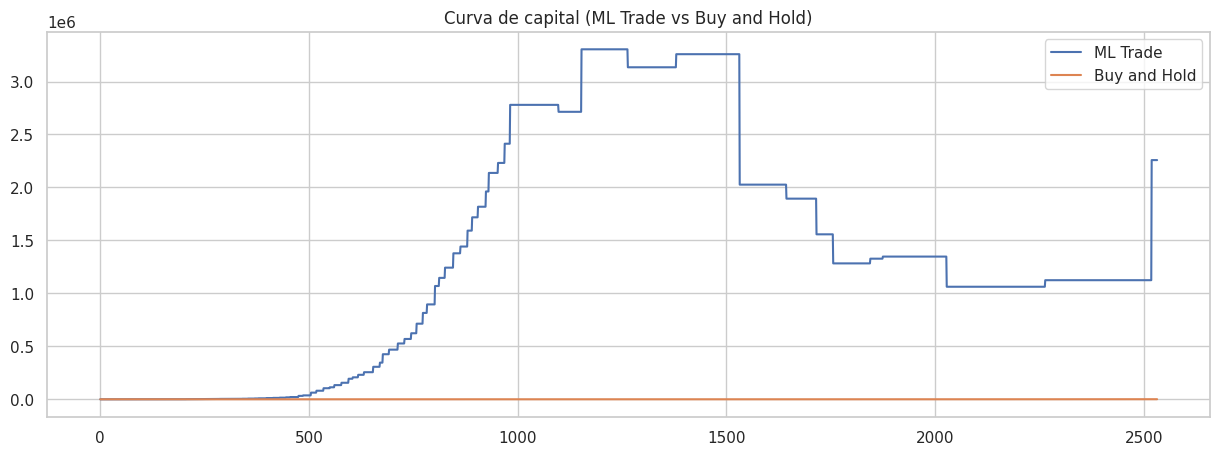

In [ ]:
clf = RandomForestClassifier(random_state=1, max_depth=18)

# Train the model
clf.fit(train_in, train_out)

# Evaluate on train
y_pred_train = clf.predict(train_in)
print(f"Training accuracy: {metrics.accuracy_score(train_out, y_pred_train):.3f}")

# Evaluate on test
y_pred_test = clf.predict(test_in)
print(f"Test accuracy: {metrics.accuracy_score(test_out, y_pred_test):.3f}")

# Predict on all available features (aligned with dados)
y_pred_all = clf.predict(features)

# Add ML predictions to DataFrame
dados['ML-Action'] = y_pred_all

# Simulate trading results based on ML predictions
dados['Saldo'] = 0
saldo = 100
comprado = 0
val_neg = 0
trades = 0
trades_pos = 0
media_pos = 0
media_neg = 0

for i in range(len(dados)):
    action = dados['ML-Action'].iloc[i]
    price = dados['Close'].iloc[i]

    if action == 1 and comprado == 0:
        val_neg = price
        comprado = 1
    elif action == 1 and comprado == -1:
        res_trade = val_neg / price - 1
        if res_trade > 0:
            trades_pos += 1
            media_pos += res_trade
        else:
            media_neg += res_trade
        saldo *= (1 + res_trade)
        trades += 1
        comprado = 0
    elif action == -1 and comprado == 0:
        comprado = -1
        val_neg = price
    elif action == -1 and comprado == 1:
        res_trade = price / val_neg - 1
        if res_trade > 0:
            trades_pos += 1
            media_pos += res_trade
        else:
            media_neg += res_trade
        saldo *= (1 + res_trade)
        trades += 1
        comprado = 0

    dados.loc[dados.index[i], 'Saldo'] = saldo

if trades_pos > 0:
    print(f"Trades total: {trades}, Trades positivos: {trades_pos} ({trades_pos/trades*100:.2f}%)")
    print(f"Média trades positivos: {media_pos/trades_pos*100:.2f}%, Média trades negativos: {media_neg/(trades - trades_pos)*100:.2f}%")
    print(f"Rent. buy and hold: {(dados['Close'].iloc[-1] / dados['Close'].iloc[0] - 1) * 100:.2f}%")
    print(f"Rent. ML trade: {(dados['Saldo'].iloc[-1] / dados['Saldo'].iloc[0] - 1) * 100:.2f}%")
else:
    print("Não foram feitos trades no período.")

# Plot equity curve
plt.figure(figsize=(15,5))
plt.title('Curva de capital (ML Trade vs Buy and Hold)')
plt.plot(dados['Saldo'], label='ML Trade')
plt.plot((dados['Close'] / dados['Close'].iloc[0]) * 100, label='Buy and Hold')
plt.legend()
plt.show()